In [37]:
# Data analysis
import numpy as np
import pandas as pd
import random as rnd

# Data visualisation
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [38]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [39]:
train_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

In [40]:
combine = [train_df, test_df]

In [41]:
#Preview data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [43]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [44]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [46]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Shreyansh Singh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


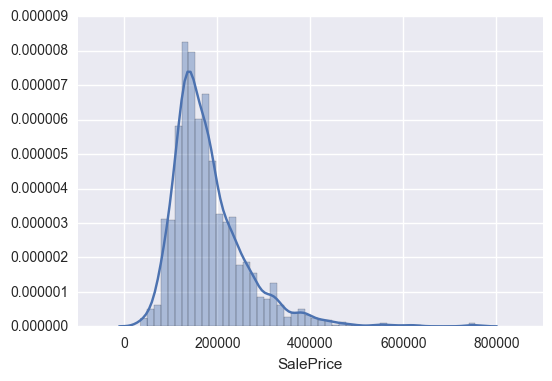

In [47]:
# Histogram
sns.distplot(train_df['SalePrice'])

In [48]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


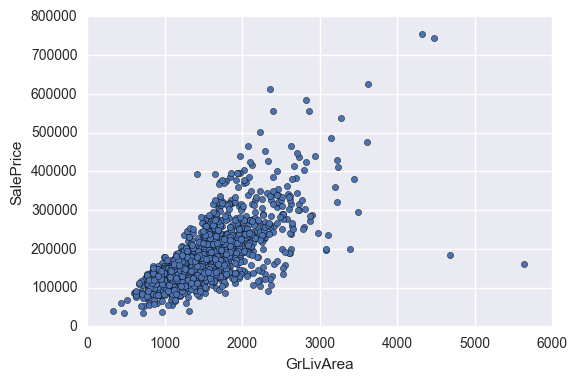

In [49]:
#scatter plot grlivarea/saleprice
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

train_df = train_df[train_df.GrLivArea < 4000]

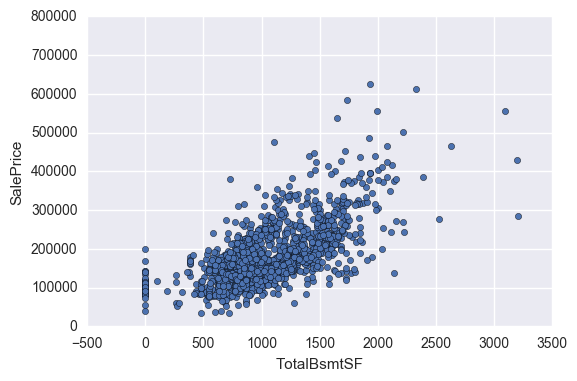

In [50]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [56]:
#Log of sale price
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
y = train_df.loc[:, 'SalePrice']

In [57]:
#Handling missing or NA value
#Alley
train_df.loc[:,'Alley'] = train_df.loc[:, 'Alley'].fillna("None")
# BedroomAbvGr : NA most likely means 0
train_df.loc[:, "BedroomAbvGr"] = train_df.loc[:, "BedroomAbvGr"].fillna(0)
#BsmtQual
train_df.loc[:, 'BsmtQual'] = train_df.loc[:, 'BsmtQual'].fillna("No")
train_df.loc[:, 'BsmtCond'] = train_df.loc[:, 'BsmtCond'].fillna("No")
train_df.loc[:, 'BsmtExposure'] = train_df.loc[:, 'BsmtCond'].fillna("No")
train_df.loc[:, 'BsmtFinType1'] = train_df.loc[:, 'BsmtFinType1'].fillna("No")
train_df.loc[:, 'BsmtFinType2'] = train_df.loc[:, 'BsmtFinType2'].fillna("No")
train_df.loc[:, "BsmtFullBath"] = train_df.loc[:, "BsmtFullBath"].fillna(0)
train_df.loc[:, "BsmtHalfBath"] = train_df.loc[:, "BsmtHalfBath"].fillna(0)
train_df.loc[:, "BsmtUnfSF"] = train_df.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train_df.loc[:, "CentralAir"] = train_df.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train_df.loc[:, "Condition1"] = train_df.loc[:, "Condition1"].fillna("Norm")
train_df.loc[:, "Condition2"] = train_df.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train_df.loc[:, "EnclosedPorch"] = train_df.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
train_df.loc[:, "ExterCond"] = train_df.loc[:, "ExterCond"].fillna("TA")
train_df.loc[:, "ExterQual"] = train_df.loc[:, "ExterQual"].fillna("TA")
#Fence
train_df.loc[:, 'Fence'] = train_df.loc[:, 'Fence'].fillna("No")
#FirePlace
train_df.loc[:, 'FireplaceQu'] = train_df.loc[:, 'FireplaceQu'].fillna("No")
train_df.loc[:, 'Fireplaces'] = train_df.loc[:, 'Fireplaces'].fillna(0)
# Functional : data description says NA means typical
train_df.loc[:, "Functional"] = train_df.loc[:, "Functional"].fillna("Typ")
#Garage
train_df.loc[:, 'GarageType'] = train_df.loc[:, 'GarageType'].fillna("No")
train_df.loc[:, 'GarageFinish'] = train_df.loc[:, 'GarageFinish'].fillna("No")
train_df.loc[:, 'GarageQual'] = train_df.loc[:, 'GarageQual'].fillna("No")
train_df.loc[:, 'GarageCond'] = train_df.loc[:, 'GarageCond'].fillna("No")
train_df.loc[:, "GarageArea"] = train_df.loc[:, "GarageArea"].fillna(0)
train_df.loc[:, "GarageCars"] = train_df.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train_df.loc[:, "HalfBath"] = train_df.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train_df.loc[:, "HeatingQC"] = train_df.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train_df.loc[:, "KitchenAbvGr"] = train_df.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train_df.loc[:, "KitchenQual"] = train_df.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train_df.loc[:, "LotFrontage"] = train_df.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train_df.loc[:, "LotShape"] = train_df.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train_df.loc[:, "MasVnrType"] = train_df.loc[:, "MasVnrType"].fillna("None")
train_df.loc[:, "MasVnrArea"] = train_df.loc[:, "MasVnrArea"].fillna(0)
#MiscFeatures
train_df.loc[:, 'MiscFeature'] = train_df.loc[:, 'MiscFeature'].fillna("No")
train_df.loc[:, 'MiscVal'] = train_df.loc[:, 'MiscVal'].fillna("No")
# OpenPorchSF : NA most likely means no open porch
train_df.loc[:, "OpenPorchSF"] = train_df.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train_df.loc[:, "PavedDrive"] = train_df.loc[:, "PavedDrive"].fillna("N")
#Pool
train_df.loc[:, 'PoolQC'] = train_df.loc[:, 'PoolQC'].fillna("No")
train_df.loc[:, "PoolArea"] = train_df.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train_df.loc[:, "SaleCondition"] = train_df.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train_df.loc[:, "ScreenPorch"] = train_df.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train_df.loc[:, "TotRmsAbvGrd"] = train_df.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
train_df.loc[:, "Utilities"] = train_df.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
train_df.loc[:, "WoodDeckSF"] = train_df.loc[:, "WoodDeckSF"].fillna(0)

In [58]:
# Some Numerical are Category
train_df = train_df.replace({ "MSSubClass": { 20: "SC20", 30: "SC30", 40: "SC40", 45: "SC45", 50: "SC50", 60: "SC60", 70: "SC70",
                                             75: "SC75", 80: "SC80", 85: "SC85", 90: "SC90", 120: "SC120", 150: "SC150", 160: "SC160"
                                            ,180: "SC180", 190: "SC190"},
                            "MoSold": { 1:"Jan", 2: "Feb", 3: "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

In [59]:
train_df = train_df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [60]:
# Create new features
# 1* Simplifications of existing features

train_df["SimplOverallQual"] = train_df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train_df["SimplOverallCond"] = train_df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train_df["SimplPoolQC"] = train_df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train_df["SimplGarageCond"] = train_df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train_df["SimplGarageQual"] = train_df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train_df["SimplFireplaceQu"] = train_df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train_df["SimplFireplaceQu"] = train_df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train_df["SimplFunctional"] = train_df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
train_df["SimplKitchenQual"] = train_df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train_df["SimplHeatingQC"] = train_df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train_df["SimplBsmtFinType1"] = train_df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train_df["SimplBsmtFinType2"] = train_df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train_df["SimplBsmtCond"] = train_df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train_df["SimplBsmtQual"] = train_df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train_df["SimplExterCond"] = train_df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train_df["SimplExterQual"] = train_df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

# 2* Combinations of existing features
# Overall quality of the house
train_df["OverallGrade"] = train_df["OverallQual"] * train_df["OverallCond"]
# Overall quality of the garage
train_df["GarageGrade"] = train_df["GarageQual"] * train_df["GarageCond"]
# Overall quality of the exterior
train_df["ExterGrade"] = train_df["ExterQual"] * train_df["ExterCond"]
# Overall kitchen score
train_df["KitchenScore"] = train_df["KitchenAbvGr"] * train_df["KitchenQual"]
# Overall fireplace score
train_df["FireplaceScore"] = train_df["Fireplaces"] * train_df["FireplaceQu"]
# Overall garage score
train_df["GarageScore"] = train_df["GarageArea"] * train_df["GarageQual"]
# Overall pool score
train_df["PoolScore"] = train_df["PoolArea"] * train_df["PoolQC"]
# Simplified overall quality of the house
train_df["SimplOverallGrade"] = train_df["SimplOverallQual"] * train_df["SimplOverallCond"]
# Simplified overall quality of the exterior
train_df["SimplExterGrade"] = train_df["SimplExterQual"] * train_df["SimplExterCond"]
# Simplified overall pool score
train_df["SimplPoolScore"] = train_df["PoolArea"] * train_df["SimplPoolQC"]
# Simplified overall garage score
train_df["SimplGarageScore"] = train_df["GarageArea"] * train_df["SimplGarageQual"]
# Simplified overall fireplace score
train_df["SimplFireplaceScore"] = train_df["Fireplaces"] * train_df["SimplFireplaceQu"]
# Simplified overall kitchen score
train_df["SimplKitchenScore"] = train_df["KitchenAbvGr"] * train_df["SimplKitchenQual"]
# Total number of bathrooms
train_df["TotalBath"] = train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]) + \
train_df["FullBath"] + (0.5 * train_df["HalfBath"])
# Total SF for house (incl. basement)
train_df["AllSF"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train_df["AllFlrsSF"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"]
# Total SF for porch
train_df["AllPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] + \
train_df["3SsnPorch"] + train_df["ScreenPorch"]
# Has masonry veneer or not
train_df["HasMasVnr"] = train_df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train_df["BoughtOffPlan"] = train_df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [61]:
#Most correlated features w.r.t target
corr = train_df.corr()
corr.sort_values(by = 'SalePrice', ascending=False, inplace=True) 

In [62]:
print(corr.SalePrice)

SalePrice            1.000000
OverallQual          0.816913
AllSF                0.813251
AllFlrsSF            0.725902
GrLivArea            0.715309
SimplOverallQual     0.706468
GarageCars           0.679692
ExterQual            0.676251
TotalBath            0.672408
KitchenQual          0.663798
GarageScore          0.655276
GarageArea           0.653637
TotalBsmtSF          0.638395
SimplExterQual       0.632145
SimplGarageScore     0.629073
BsmtQual             0.613890
1stFlrSF             0.610242
SimplKitchenQual     0.608510
OverallGrade         0.605025
SimplBsmtQual        0.593948
FullBath             0.590163
YearBuilt            0.589986
ExterGrade           0.584830
YearRemodAdd         0.569771
GarageYrBlt          0.545178
FireplaceQu          0.545024
TotRmsAbvGrd         0.530980
SimplOverallGrade    0.527998
SimplKitchenScore    0.522029
FireplaceScore       0.516191
                       ...   
SimplBsmtCond        0.206338
AllPorchSF           0.196752
LotFrontag

In [63]:
# Create new features
# 3* Polynomials on the top 10 existing features
train_df["OverallQual-s2"] = train_df["OverallQual"] ** 2
train_df["OverallQual-s3"] = train_df["OverallQual"] ** 3
train_df["OverallQual-Sq"] = np.sqrt(train_df["OverallQual"])
train_df["AllSF-2"] = train_df["AllSF"] ** 2
train_df["AllSF-3"] = train_df["AllSF"] ** 3
train_df["AllSF-Sq"] = np.sqrt(train_df["AllSF"])
train_df["AllFlrsSF-2"] = train_df["AllFlrsSF"] ** 2
train_df["AllFlrsSF-3"] = train_df["AllFlrsSF"] ** 3
train_df["AllFlrsSF-Sq"] = np.sqrt(train_df["AllFlrsSF"])
train_df["GrLivArea-2"] = train_df["GrLivArea"] ** 2
train_df["GrLivArea-3"] = train_df["GrLivArea"] ** 3
train_df["GrLivArea-Sq"] = np.sqrt(train_df["GrLivArea"])
train_df["SimplOverallQual-s2"] = train_df["SimplOverallQual"] ** 2
train_df["SimplOverallQual-s3"] = train_df["SimplOverallQual"] ** 3
train_df["SimplOverallQual-Sq"] = np.sqrt(train_df["SimplOverallQual"])
train_df["ExterQual-2"] = train_df["ExterQual"] ** 2
train_df["ExterQual-3"] = train_df["ExterQual"] ** 3
train_df["ExterQual-Sq"] = np.sqrt(train_df["ExterQual"])
train_df["GarageCars-2"] = train_df["GarageCars"] ** 2
train_df["GarageCars-3"] = train_df["GarageCars"] ** 3
train_df["GarageCars-Sq"] = np.sqrt(train_df["GarageCars"])
train_df["TotalBath-2"] = train_df["TotalBath"] ** 2
train_df["TotalBath-3"] = train_df["TotalBath"] ** 3
train_df["TotalBath-Sq"] = np.sqrt(train_df["TotalBath"])
train_df["KitchenQual-2"] = train_df["KitchenQual"] ** 2
train_df["KitchenQual-3"] = train_df["KitchenQual"] ** 3
train_df["KitchenQual-Sq"] = np.sqrt(train_df["KitchenQual"])
train_df["GarageScore-2"] = train_df["GarageScore"] ** 2
train_df["GarageScore-3"] = train_df["GarageScore"] ** 3
train_df["GarageScore-Sq"] = np.sqrt(train_df["GarageScore"])

In [64]:
#Differentiate Numerical and Categorical Features
categorical_features = train_df.select_dtypes(include=["object"]).columns
numerical_features = train_df.select_dtypes(exclude=["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features: "+str(len(numerical_features)))
print("Categorical features: "+str(len(categorical_features)))

Numerical features: 118
Categorical features: 26


In [65]:
train_num = train_df[numerical_features]
train_cat = train_df[categorical_features]

In [66]:
#Handle remaining NAs
print("NAs for numerically features: "+str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerically features: 81
Remaining NAs for numerical features in train : 0


In [67]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regres
#sion-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness)>0.5]
print(str(skewness.shape[0]))
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])

86


In [68]:
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 1
Remaining NAs for categorical features in train : 0


In [69]:
#Join numerical and categorical features
train_df = pd.concat([train_num, train_cat], axis=1)
print("New no. of features: "+ str(train_df.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

New no. of features: 320
X_train : (1019, 320)
X_test : (437, 320)
y_train : (1019,)
y_test : (437,)


In [70]:
#Standardise Numerical Features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

C:\Users\Shreyansh Singh\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [71]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 0.0316327555257
RMSE on Test set : 0.0304203636838


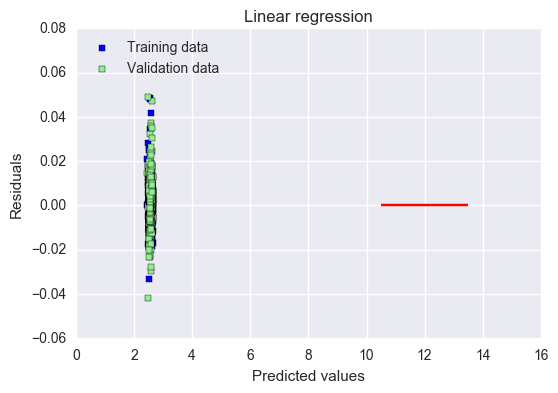

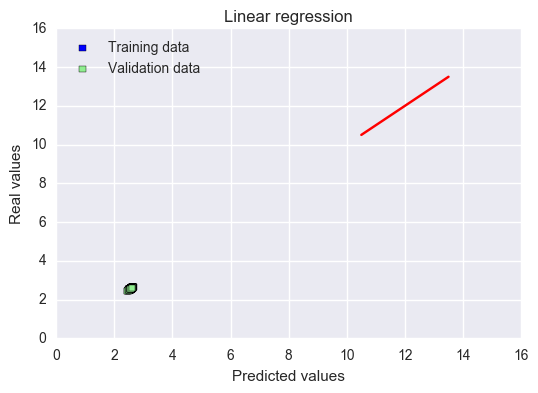

In [72]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

Best alpha : 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 28.5
Ridge RMSE on Training set : 0.00902513433742
Ridge RMSE on Test set : 0.00905398517878


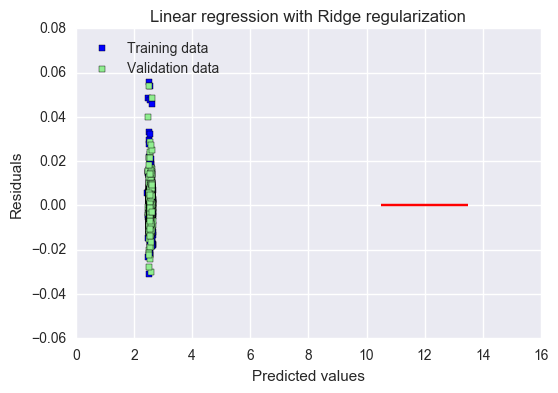

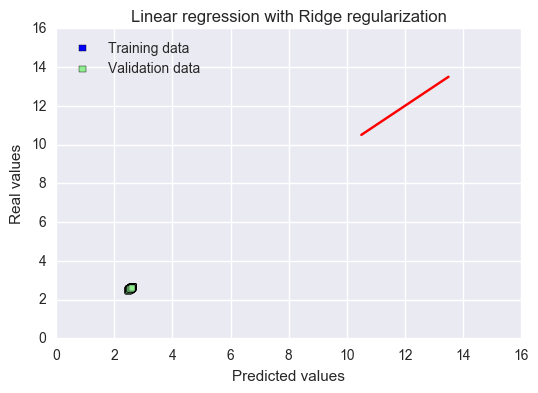

Ridge picked 317 features and eliminated the other 3 features


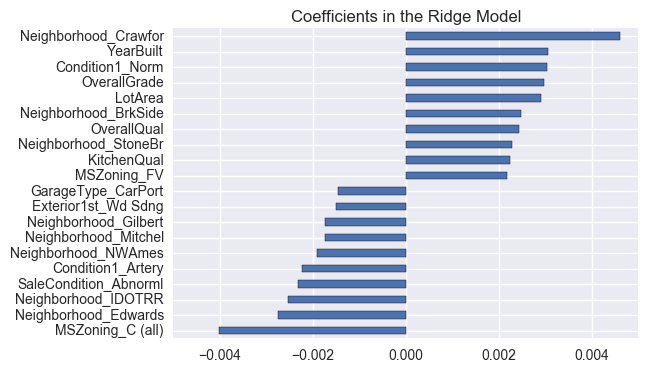

In [73]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05
Lasso RMSE on Training set : 0.00887801601967
Lasso RMSE on Test set : 0.00887589648683


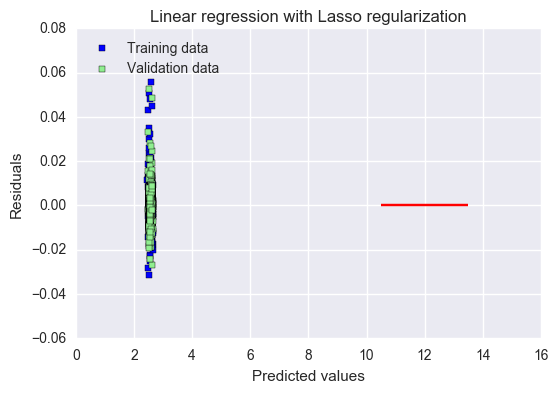

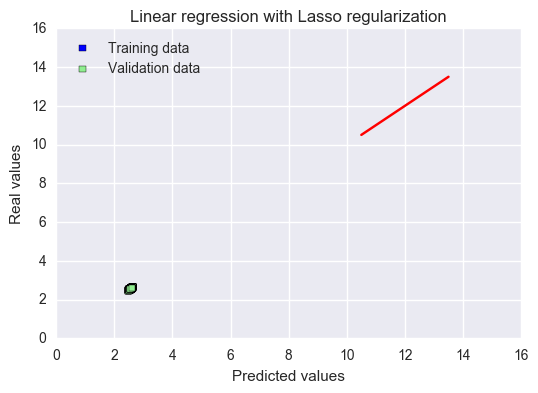

Lasso picked 105 features and eliminated the other 215 features


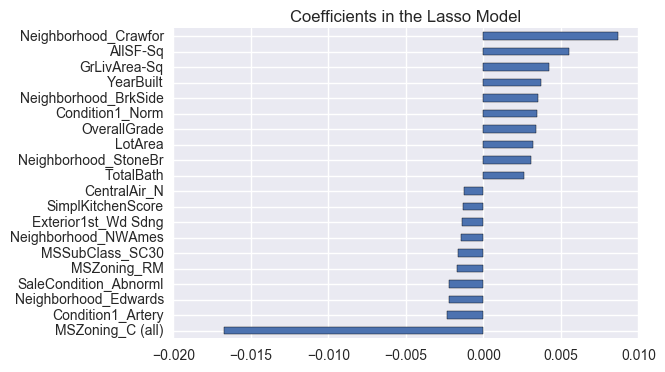

In [74]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

Best l1_ratio : 0.5
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.5
Best l1_ratio : 0.45
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.45 and alpha centered around 0.0001
Best l1_ratio : 0.45
Best alpha : 0.0001
ElasticNet RMSE on Training set : 0.00888470866329
ElasticNet RMSE on Test set : 0.00899385374628


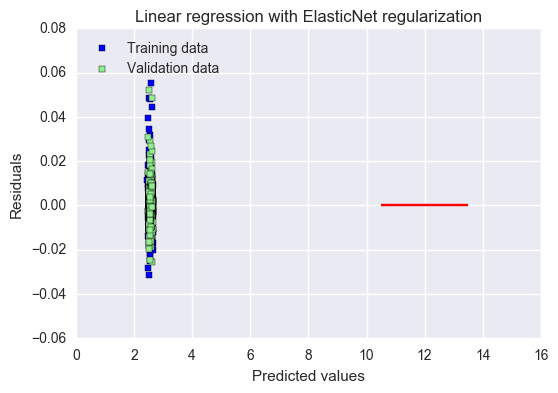

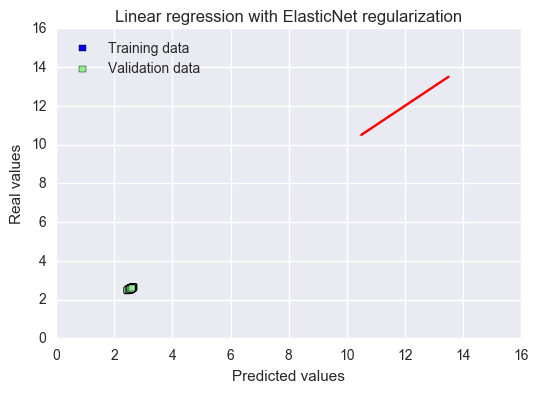

ElasticNet picked 115 features and eliminated the other 205 features


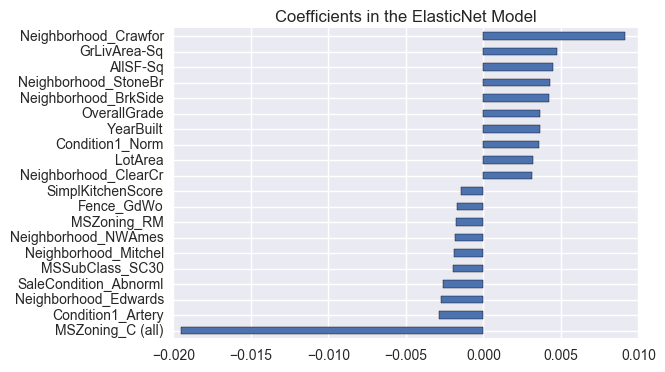

In [75]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

In [76]:
X_test2 = test_df.drop("Id", axis=1).copy()

In [81]:
X_test2.shape

(1459, 79)

In [82]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_pred_final = lr.predict(X_test2)

RMSE on Training set : 0.0316327555257
RMSE on Test set : 0.0304203636838


ValueError: could not convert string to float: 'Normal'

In [ ]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('./submission.csv', index=False)